Chapter 18: Simulation of Financial Models

In [ ]:
import sys
import os


target_path = os.path.abspath("../dx") #상위폴더의 dx폴더
sys.path.append(target_path)

In [12]:
from sn_random_numbers import *

In [13]:
snrn = sn_random_numbers((2,2,2), antithetic =False, moment_matching=False, fixed_seed=True)
snrn

array([[[-0.8044583 ,  0.32093155],
        [-0.02548288,  0.64432383]],

       [[-0.30079667,  0.38947455],
        [-0.1074373 , -0.47998308]]])

In [14]:
round(snrn.mean(),6)

np.float64(-0.045429)

In [15]:
round(snrn.std(),6)

np.float64(0.451876)

In [16]:
snrn = sn_random_numbers((2,2,2), antithetic=False, moment_matching=True, fixed_seed=True)
snrn

array([[[-1.67972865,  0.81075283],
        [ 0.04413963,  1.52641815]],

       [[-0.56512826,  0.96243813],
        [-0.13722505, -0.96166678]]])

In [17]:
round(snrn.mean(),6)

np.float64(-0.0)

In [18]:
round(snrn.std(),6)

np.float64(1.0)

In [19]:
from dx_frame import *

In [20]:
me_gbm = market_environment('me_gbm', dt.datetime(2020, 1, 1))

In [21]:
me_gbm.add_constant('initial_value', 36.)
me_gbm.add_constant('volatility', 0.2)
me_gbm.add_constant('final_date', dt.datetime(2020, 12, 31))
me_gbm.add_constant('currency', 'EUR')
me_gbm.add_constant('frequency', 'M')  
me_gbm.add_constant('paths', 10000)

In [22]:
csr = constant_short_rate('csr', 0.06)

In [23]:
me_gbm.add_curve('discount_curve', csr)

In [24]:
from geometric_brownian_motion import geometric_brownian_motion

In [25]:
gbm = geometric_brownian_motion('gbm', me_gbm)

In [26]:
gbm.generate_time_grid()

c:\Users\user\Documents\GitHub\Python_Finance\dx\simulation_class.py:71: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_grid = pd.date_range(start=start, end=end,


In [27]:
gbm.time_grid 

array([datetime.datetime(2020, 1, 1, 0, 0),
       datetime.datetime(2020, 1, 31, 0, 0),
       datetime.datetime(2020, 2, 29, 0, 0),
       datetime.datetime(2020, 3, 31, 0, 0),
       datetime.datetime(2020, 4, 30, 0, 0),
       datetime.datetime(2020, 5, 31, 0, 0),
       datetime.datetime(2020, 6, 30, 0, 0),
       datetime.datetime(2020, 7, 31, 0, 0),
       datetime.datetime(2020, 8, 31, 0, 0),
       datetime.datetime(2020, 9, 30, 0, 0),
       datetime.datetime(2020, 10, 31, 0, 0),
       datetime.datetime(2020, 11, 30, 0, 0),
       datetime.datetime(2020, 12, 31, 0, 0)], dtype=object)

In [28]:
 %time paths_1 = gbm.get_instrument_values() 

CPU times: total: 0 ns
Wall time: 3.63 ms


In [29]:
 paths_1.round(3)

array([[36.   , 36.   , 36.   , ..., 36.   , 36.   , 36.   ],
       [37.403, 38.12 , 34.4  , ..., 36.252, 35.084, 39.668],
       [39.562, 42.335, 32.405, ..., 34.836, 33.637, 37.655],
       ...,
       [40.534, 33.506, 23.497, ..., 37.851, 30.122, 30.446],
       [42.527, 36.995, 21.885, ..., 36.014, 30.907, 30.712],
       [43.811, 37.876, 24.1  , ..., 36.263, 28.138, 29.038]],
      shape=(13, 10000))

In [30]:
gbm.update(volatility=0.5)

In [31]:
%time paths_2 = gbm.get_instrument_values()

CPU times: total: 0 ns
Wall time: 3.7 ms


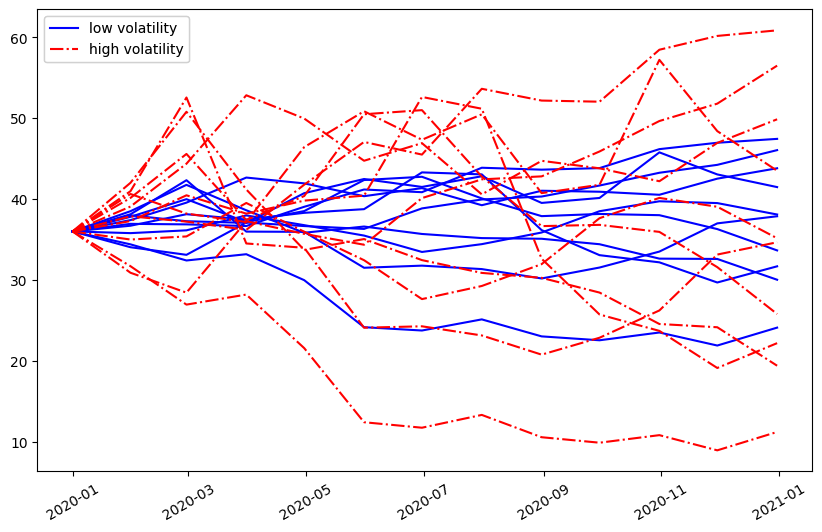

In [38]:
from pylab import mpl, plt
plt.figure(figsize=(10, 6))
p1 = plt.plot(gbm.time_grid, paths_1[:, :10], 'b')
p2 = plt.plot(gbm.time_grid, paths_2[:, :10], 'r-.')
l1 = plt.legend([p1[0], p2[0]],
['low volatility', 'high volatility'], loc=2)
plt.gca().add_artist(l1)
plt.xticks(rotation=30);

Figure 18-1. Simulated paths from GBM simulation class

In [39]:
me_jd = market_environment('me_jd', dt.datetime(2020, 1, 1))

In [41]:
me_jd.add_constant('lambda', 0.3) 
me_jd.add_constant('mu', -0.75)  
me_jd.add_constant('delta', 0.1) 

In [ ]:
me_jd.add_environment(me_gbm) 

In [43]:
from jump_diffusion import jump_diffusion

In [44]:
 jd = jump_diffusion('jd', me_jd)

In [45]:
%time paths_3 = jd.get_instrument_values()

CPU times: total: 0 ns
Wall time: 8.55 ms


c:\Users\user\Documents\GitHub\Python_Finance\dx\simulation_class.py:71: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_grid = pd.date_range(start=start, end=end,


In [46]:
jd.update(lamb=0.9)

In [48]:
%time paths_4 = jd.get_instrument_values()

CPU times: total: 15.6 ms
Wall time: 8.63 ms


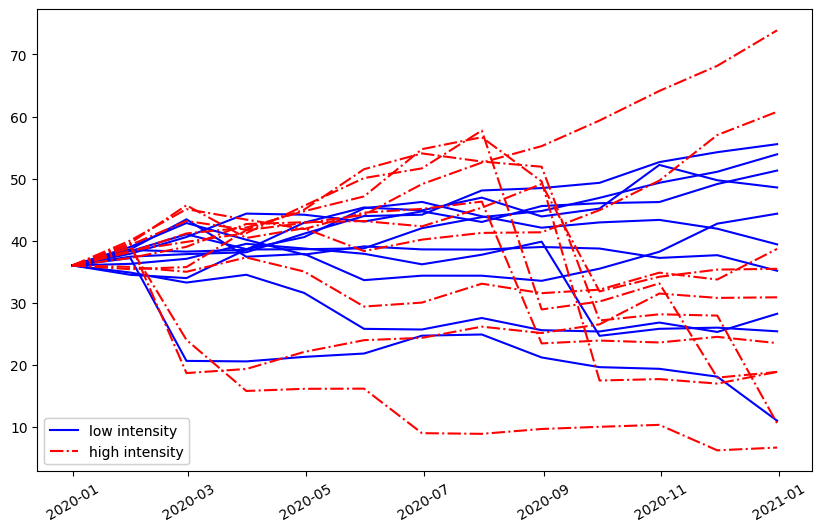

In [49]:
plt.figure(figsize=(10, 6))
p1 = plt.plot(gbm.time_grid, paths_3[:, :10], 'b')
p2 = plt.plot(gbm.time_grid, paths_4[:, :10], 'r-.')
l1 = plt.legend([p1[0], p2[0]],
['low intensity', 'high intensity'], loc=3)
plt.gca().add_artist(l1)
plt.xticks(rotation=30);

Figure 18-2. Simulated paths from jump diffusion simulation class